[ADS Entry](http://adsabs.harvard.edu/abs/1996ApJ...457L..61K)

In [40]:
import sympy
sympy.init_printing()

Equation 1

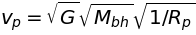

In [41]:
G = sympy.Symbol('G', positive=True) # Universal constant of gravitation
M_bh = sympy.Symbol(r'M_{bh}', positive=True) # Black hole mass
R_p = sympy.Symbol('R_p') # Periapse distance
v_p = sympy.Symbol('v_p') # Periapse velocity
eqn_1 = sympy.Eq(v_p,sympy.sqrt(G*M_bh/R_p))
eqn_1

Equation 2

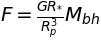

In [42]:
F = sympy.Symbol('F') # Tidal force
R_star = sympy.Symbol('R_*') # Stellar radius
eqn_2 = sympy.Eq(F,G*M_bh*R_star/R_p**3)
eqn_2

Equation 3

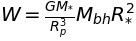

In [43]:
M_star = sympy.Symbol('M_*') # Stellar mass
W = sympy.Symbol('W') # Gravitational work by the black hole
_ = F*M_star*R_star
_ = _.subs(eqn_2.lhs,eqn_2.rhs)
eqn_3 = sympy.Eq(W,_)
eqn_3

Equation 4

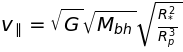

In [44]:
v_para = sympy.Symbol(r'v_{\parallel}') # Velocity of unbound debris
_ = sympy.sqrt(F*R_star)
_ = _.subs(eqn_2.lhs, eqn_2.rhs)
eqn_4 = sympy.Eq(v_para,_)
eqn_4

I totally disagree with equations 5 - 7. The perpendicular velocity can exceed the pre - disruption escape velocity, as was discussed in Brassart and Luminet.

Equation 8

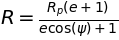

In [45]:
R = sympy.Symbol('R') # Distance from the black hole
psi = sympy.Symbol('psi') # True anomaly
e = sympy.Symbol('e') # Eccentricity
eqn_8 = sympy.Eq(R, R_p*(1+e)/(1+e*sympy.cos(psi)))
eqn_8

Equation 9

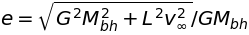

In [46]:
v_inf = sympy.Symbol(r'v_{\infty}', positive=True) # Velocity at infinity
v_r = sympy.Symbol('v_r') # Radial velocity
v_psi = sympy.Symbol('v_psi') # Tangential velocity
psi_dot = sympy.Symbol(r'\dot{\psi}') # Angular velocity
L = sympy.Symbol('L') # Angular momentum
_ = sympy.Eq(v_inf**2/2, -G*M_bh/R+(v_r**2+v_psi**2)/2)
_ = _.subs(v_psi,R*psi_dot)
_ = _.subs(v_r,sympy.Derivative(R,psi)*psi_dot)
_ = _.subs(psi_dot,L/R**2)
_ = _.subs(eqn_8.lhs, eqn_8.rhs)
_ = _.doit().simplify()
_ = sympy.solve([_.subs(psi,0),_.subs(psi,sympy.pi/2)],[R_p,e])[1][1]
eqn_9 = sympy.Eq(e,_)
eqn_9

Equation 10

In [47]:
psi_inf = sympy.Symbol(r'\psi_{\infty}') # True anomaly at infinite distance
_ = eqn_8
_ = _.rhs
_ = sympy.fraction(_)[1]
_ = sympy.solve(_,sympy.cos(psi))[0]
eqn_10 = sympy.Eq(sympy.cos(psi_inf),_)
eqn_10

Equation 11

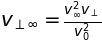

In [51]:
v_perp = sympy.Symbol(r'v_{\perp}') # Velocity perpendicular to the plane of motion
v_0 = sympy.Symbol('v_0') # Velocity at periapse
v_perp_inf = sympy.Symbol(r'v_{\perp \infty}')
_ = v_inf*sympy.sin(psi_inf)*v_perp/v_0
_ = _.subs(sympy.sin(psi_inf),sympy.sqrt(1-sympy.cos(psi_inf)**2))
_ = _.subs(eqn_10.lhs, eqn_10.rhs)
_ = _.subs(eqn_9.lhs,eqn_9.rhs)
_ = _.series(L,0,2).removeO()
_ = _.simplify()
_ = _.subs(L,v_0*R_p)
_ = _.subs(R_p,G*M_bh/v_0**2)
eqn_11 = sympy.Eq(v_perp_inf,_)
eqn_11

Equation 12

In [53]:
alpha_perp = sympy.Symbol(r'\alpha_{\perp}')
eqn_12 = sympy.Eq(alpha_perp,v_perp_inf/v_inf)
eqn_12

Equation 13

In [65]:
alpha_para = sympy.Symbol(r'\alpha_{\parallel}')
_ = sympy.sin(sympy.pi-psi_inf)
_ = _.subs(sympy.sin(psi_inf),sympy.sqrt(1-sympy.cos(psi_inf)**2))
_ = _.subs(eqn_10.lhs, eqn_10.rhs)
_ = _.subs(eqn_9.lhs, eqn_9.rhs)
_ = _.series(L,0,2).removeO()
_ = _.subs(L,R_p*v_0)
_ = _.subs(R_p,G*M_bh/v_0**2)
_ = _.simplify()
eqn_13 = sympy.Eq(alpha_para,_)
eqn_13

Equation 14

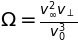

In [74]:
Omega = sympy.Symbol('Omega') # Solid angle
_ = sympy.Eq(Omega, alpha_para*alpha_perp)
_ = _.subs(eqn_13.lhs, eqn_13.rhs)
_ = _.subs(eqn_12.lhs, eqn_12.rhs)
_ = _.subs(eqn_11.lhs, eqn_11.rhs)
eqn_14 = _
eqn_14

Equation 15

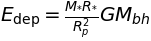

In [76]:
E_dep = sympy.Symbol(r'E_{\rm dep}') # Liberated energy in TDE
_ = M_star*v_inf**2
_ = _.subs(v_inf,sympy.sqrt(G*M_bh*R_star/R_p**2))
eqn_15 = sympy.Eq(E_dep,_)
eqn_15